In [1]:
import random
import statistics as st
import matplotlib.pyplot as plt
from game import Game
from player import Player, Score_Stop_Player, Roll_Stop_Player, Strategic_Player

In [2]:
%matplotlib inline

In [3]:
def player_sims(**kwargs):
    player = Player()
    if "score_stop" in kwargs:
        player = Score_Stop_Player(kwargs["score_stop"])
    elif "roll_stop" in kwargs:
        player = Roll_Stop_Player(kwargs["roll_stop"])
    return Game(player)

In [4]:
default_player_solitaire = [player_sims().run() for _ in range(10000)]
score_stop_player_solitaire = [player_sims(score_stop=12).run() for _ in range(10000)]
roll_stop_player_solitaire = [player_sims(roll_stop=3).run() for _ in range(10000)]

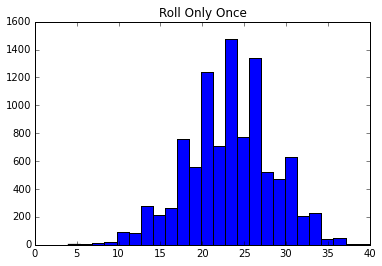

In [5]:
plt.hist(default_player_solitaire, bins=25)
plt.title("Roll Only Once")
plt.show()

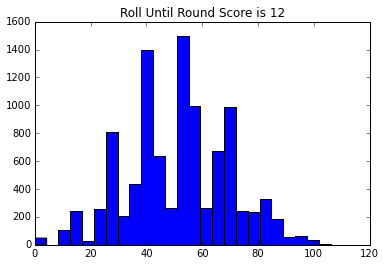

In [6]:
plt.hist(score_stop_player_solitaire, bins=25)
plt.title("Roll Until Round Score is 12")
plt.show()

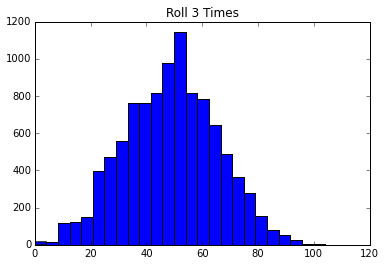

In [7]:
plt.hist(roll_stop_player_solitaire, bins=25)
plt.title("Roll 3 Times")
plt.show()

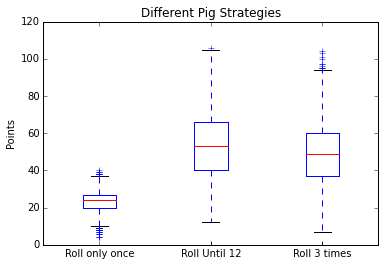

In [8]:
plt.boxplot([default_player_solitaire, score_stop_player_solitaire, roll_stop_player_solitaire])
plt.title("Different Pig Strategies")
plt.xticks(range(1, 4), ["Roll only once", "Roll Until 12", "Roll 3 times"])
plt.ylabel("Points")
plt.show()

In [9]:
score_stop_player_solitaire = [[player_sims(score_stop=stop).run() for _ in range(10000)] for stop in range(18, 23)]
roll_stop_player_solitaire = [[player_sims(roll_stop=stop).run() for _ in range(10000)] for stop in range(1, 10)]

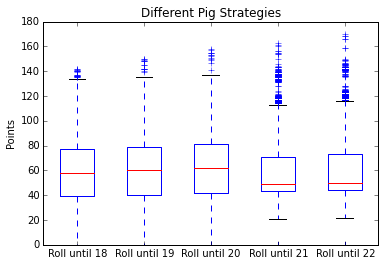

In [10]:
plt.boxplot(score_stop_player_solitaire)
plt.title("Different Pig Strategies")
plt.xticks(range(1, 6), ["Roll until {}".format(stop) for stop in range(18, 23)])
plt.ylabel("Points")
plt.show()

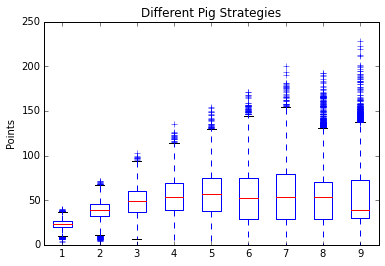

In [11]:
plt.boxplot(roll_stop_player_solitaire)
plt.title("Different Pig Strategies")
plt.xticks(range(1, 10), range(1, 10))
plt.ylabel("Points")
plt.show()

In [4]:
final_strategies = [[player_sims(score_stop=12).run(),
                     player_sims(score_stop=20).run(),
                     player_sims(roll_stop=4).run(),
                     player_sims(roll_stop=5).run()] for _ in range(1000000)]

In [5]:
zipped_strategies = list(zip(*final_strategies))

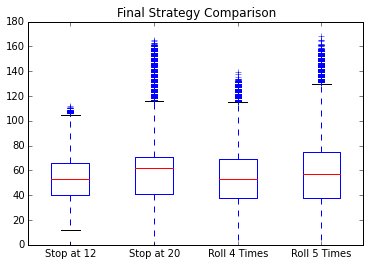

In [7]:
plt.boxplot(zipped_strategies)
plt.title("Final Strategy Comparison")
plt.xticks(range(1, 5), ["Stop at 12", "Stop at 20", "Roll 4 Times", "Roll 5 Times"])
plt.show()

In [8]:
stop_at_12_sims = [st.stdev([player_sims(score_stop=12).run() for _1 in range(20)]) for _ in range(100000)]
stop_at_20_sims = [st.stdev([player_sims(score_stop=20).run() for _1 in range(20)]) for _ in range(100000)]
stop_at_4_sims = [st.stdev([player_sims(roll_stop=4).run() for _1 in range(20)]) for _ in range(100000)]
stop_at_5_sims = [st.stdev([player_sims(roll_stop=5).run() for _1 in range(20)]) for _ in range(100000)]

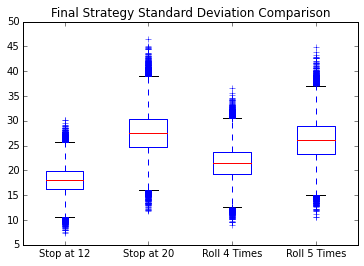

In [9]:
plt.boxplot([stop_at_12_sims, stop_at_20_sims, stop_at_4_sims, stop_at_5_sims])
plt.title("Final Strategy Standard Deviation Comparison")
plt.xticks(range(1, 5), ["Stop at 12", "Stop at 20", "Roll 4 Times", "Roll 5 Times"])
plt.show()

In [10]:
def competetive_sims(**kwargs):
    players = []
    if "score_stop" in kwargs:
        players += [Score_Stop_Player(stop) for stop in kwargs["score_stop"]]
    if "roll_stop" in kwargs:
        players += [Roll_Stop_Player(stop) for stop in kwargs["roll_stop"]]
    random.shuffle(players)
    return Game(players)

In [11]:
competetive_results = [competetive_sims(score_stop=[12, 20], roll_stop = [4, 5]).run() for _ in range(100000)]

In [12]:
wins_count = [competetive_results.count('Score Stop 12'),
              competetive_results.count('Score Stop 20'),
              competetive_results.count('Roll Stop 4'),
              competetive_results.count('Roll Stop 5')]

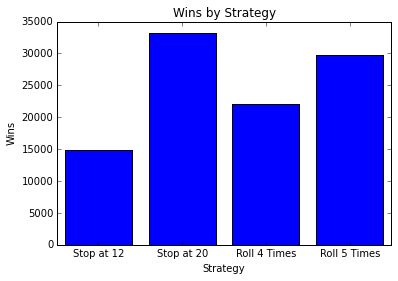

In [13]:
plt.bar([x - .4 for x in range(1, 5)], wins_count)
plt.title("Wins by Strategy")
plt.ylabel("Wins")
plt.xlabel("Strategy")
plt.xticks(range(1, 5), ["Stop at 12", "Stop at 20", "Roll 4 Times", "Roll 5 Times"])
plt.show()

In [14]:
score_stop_competetive_results = [competetive_sims(score_stop=[18, 19, 20, 21, 22], roll_stop = [5]).run() for _ in range(100000)]

In [15]:
score_stop_wins_count = [score_stop_competetive_results.count('Score Stop 18'),
                         score_stop_competetive_results.count('Score Stop 19'),
                         score_stop_competetive_results.count('Score Stop 20'),
                         score_stop_competetive_results.count('Score Stop 21'),
                         score_stop_competetive_results.count('Score Stop 22'),
                         score_stop_competetive_results.count('Roll Stop 5')]

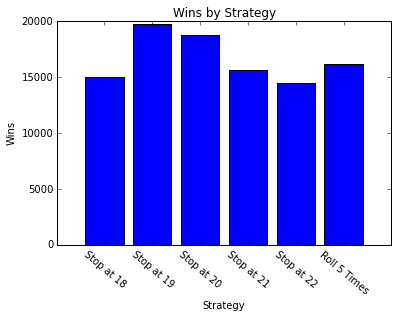

In [16]:
plt.bar([x - .4 for x in range(1, 7)], score_stop_wins_count)
plt.title("Wins by Strategy")
plt.ylabel("Wins")
plt.xlabel("Strategy")
plt.xticks(range(1, 7), ["Stop at 18", "Stop at 19", "Stop at 20", "Stop at 21", "Stop at 22","Roll 5 Times"], rotation=-40)
plt.show()

In [17]:
final_competetive_results = [competetive_sims(score_stop=[19, 20]).run() for _ in range(1000000)]

In [18]:
final_wins_count = [final_competetive_results.count('Score Stop 19'),
                         final_competetive_results.count('Score Stop 20')]

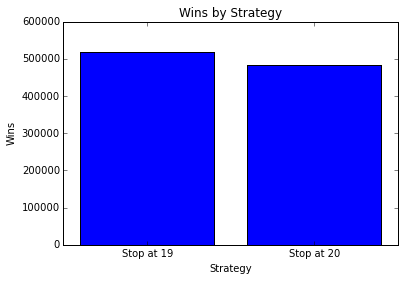

In [19]:
plt.bar([x - .4 for x in range(1, 3)], final_wins_count)
plt.title("Wins by Strategy")
plt.ylabel("Wins")
plt.xlabel("Strategy")
plt.xticks(range(1, 3), ["Stop at 19", "Stop at 20"])
plt.show()

In [3]:
def final_strategy_sims(**kwargs):
    players = []
    if "score_stop" in kwargs:
        players += [Score_Stop_Player(stop) for stop in kwargs["score_stop"]]
    if "strategy_stop" in kwargs:
        players += [Strategic_Player(stop) for stop in kwargs["strategy_stop"]]
    random.shuffle(players)
    return Game(players)

In [4]:
strategy_sims = [final_strategy_sims(score_stop=[19, 20], strategy_stop = [18, 19, 20, 21]).run() for _ in range(100000)]

In [5]:
strategy_wins_count = [strategy_sims.count('Score Stop 19'),
                       strategy_sims.count('Score Stop 20'),
                       strategy_sims.count('Strategic Score Stop 18'),
                       strategy_sims.count('Strategic Score Stop 19'),
                       strategy_sims.count('Strategic Score Stop 20'),
                       strategy_sims.count('Strategic Score Stop 21')]

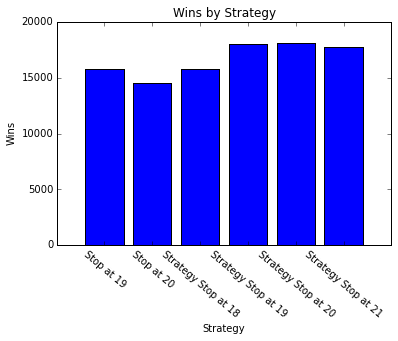

In [6]:
plt.bar([x - .4 for x in range(1, 7)], strategy_wins_count)
plt.title("Wins by Strategy")
plt.ylabel("Wins")
plt.xlabel("Strategy")
plt.xticks(range(1, 7), ["Stop at 19", "Stop at 20", "Strategy Stop at 18", "Strategy Stop at 19", "Strategy Stop at 20", "Strategy Stop at 21"], rotation=-40)
plt.show()

In [7]:
strategy_sims = [final_strategy_sims(score_stop=[19], strategy_stop = [19, 20, 21, 22, 23]).run() for _ in range(100000)]

In [8]:
strategy_wins_count = [strategy_sims.count('Score Stop 19'),
                       strategy_sims.count('Strategic Score Stop 19'),
                       strategy_sims.count('Strategic Score Stop 20'),
                       strategy_sims.count('Strategic Score Stop 21'),
                       strategy_sims.count('Strategic Score Stop 22'),
                       strategy_sims.count('Strategic Score Stop 23')]

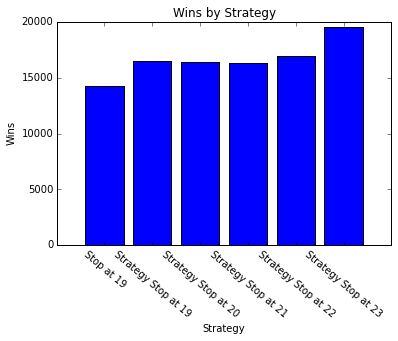

In [9]:
plt.bar([x - .4 for x in range(1, 7)], strategy_wins_count)
plt.title("Wins by Strategy")
plt.ylabel("Wins")
plt.xlabel("Strategy")
plt.xticks(range(1, 7), ["Stop at 19", "Strategy Stop at 19", "Strategy Stop at 20", "Strategy Stop at 21", "Strategy Stop at 22", "Strategy Stop at 23"], rotation=-40)
plt.show()

In [11]:
strategy_sims = [final_strategy_sims(score_stop=[19], strategy_stop = [23]).run() for _ in range(100000)]

In [12]:
strategy_wins_count = [strategy_sims.count('Score Stop 19'),
                       strategy_sims.count('Strategic Score Stop 23')]

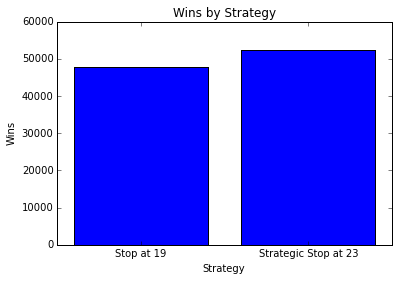

In [13]:
plt.bar([x - .4 for x in range(1, 3)], strategy_wins_count)
plt.title("Wins by Strategy")
plt.ylabel("Wins")
plt.xlabel("Strategy")
plt.xticks(range(1, 3), ["Stop at 19", "Strategic Stop at 23"])
plt.show()

In [18]:
strategy_sims = [final_strategy_sims(score_stop=[19], strategy_stop=[19]).run() for _ in range(100000)]

In [19]:
strategy_wins_count = [strategy_sims.count('Score Stop 19'),
                       strategy_sims.count('Strategic Score Stop 19')]

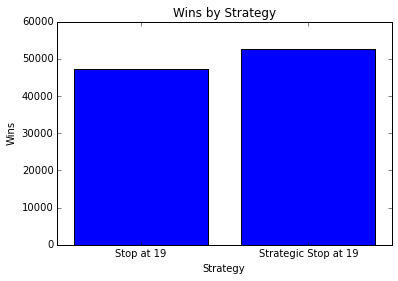

In [20]:
plt.bar([x - .4 for x in range(1, 3)], strategy_wins_count)
plt.title("Wins by Strategy")
plt.ylabel("Wins")
plt.xlabel("Strategy")
plt.xticks(range(1, 3), ["Stop at 19", "Strategic Stop at 19"])
plt.show()

In [21]:
strategy_sims = [final_strategy_sims(score_stop=[19], strategy_stop = [20]).run() for _ in range(100000)]

In [22]:
strategy_wins_count = [strategy_sims.count('Score Stop 19'),
                       strategy_sims.count('Strategic Score Stop 20')]

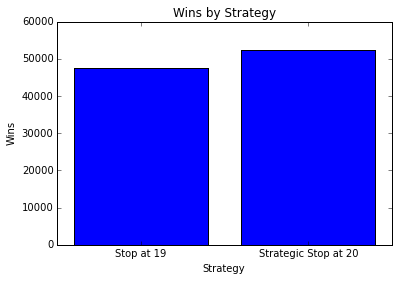

In [23]:
plt.bar([x - .4 for x in range(1, 3)], strategy_wins_count)
plt.title("Wins by Strategy")
plt.ylabel("Wins")
plt.xlabel("Strategy")
plt.xticks(range(1, 3), ["Stop at 19", "Strategic Stop at 20"])
plt.show()

In [35]:
strategy_sims = [final_strategy_sims(strategy_stop = [19, 20]).run() for _ in range(1000000)]

In [36]:
strategy_wins_count = [strategy_sims.count('Strategic Score Stop 19'),
                       strategy_sims.count('Strategic Score Stop 20')]

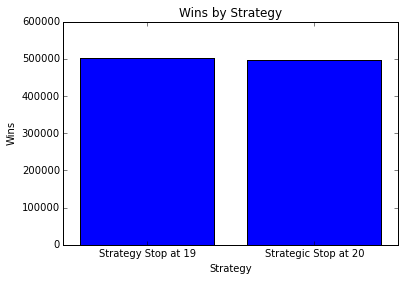

[503215, 496785]


In [37]:
plt.bar([x - .4 for x in range(1, 3)], strategy_wins_count)
plt.title("Wins by Strategy")
plt.ylabel("Wins")
plt.xlabel("Strategy")
plt.xticks(range(1, 3), ["Strategy Stop at 19", "Strategic Stop at 20"])
plt.show()
print(strategy_wins_count)

In [38]:
strategy_sims = [final_strategy_sims(strategy_stop = [19, 23]).run() for _ in range(1000000)]

In [39]:
strategy_wins_count = [strategy_sims.count('Strategic Score Stop 19'),
                       strategy_sims.count('Strategic Score Stop 23')]

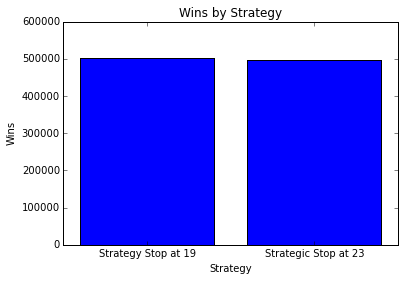

[501910, 498090]


In [40]:
plt.bar([x - .4 for x in range(1, 3)], strategy_wins_count)
plt.title("Wins by Strategy")
plt.ylabel("Wins")
plt.xlabel("Strategy")
plt.xticks(range(1, 3), ["Strategy Stop at 19", "Strategic Stop at 23"])
plt.show()
print(strategy_wins_count)

#Article on Pig
http://cs.gettysburg.edu/~tneller/papers/pig.pdf